# 检查是否溢流
使用全井的数据检测，也就是混合检查吧，提取80%的训练数据，然后提取20的测试数据

In [18]:
import random
import time
import datetime
import pandas as pd
import lightgbm as lgb
import numpy as np
from Intelligent_well_control.src.models.utils.save_to_csv import SaveToCsv
from Intelligent_well_control.src.models.LGBM import LGBModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'E:\data\压井\新数据\间接数据\大区块数据2.csv')

In [21]:
labels = 'overflow_detected'
rem_col_list = ['id', 'well_id', 'time', 'overflow_flag',
                'work_state', 'invader_type', 'kill_main_method_x',
                'deal_density', 'overflow_detected', 'block_id',
                'standpipe_pressure', 'casing_pressure']
feature_names = list(
                filter(lambda x: x not in rem_col_list, data.columns))

model1 = lgb.LGBMClassifier(n_estimators=500)

train_well_ids = [11, 21, 17]
test_well_ids = [111]

X_train = data[data['well_id'].isin(train_well_ids)][feature_names]
Y_train = data[data['well_id'].isin(train_well_ids)][labels]
X_test = data[data['well_id'].isin(test_well_ids)][feature_names]
Y_test = data[data['well_id'].isin(test_well_ids)][labels]

# 初始化 StandardScaler
scaler = StandardScaler()

# 对数据进行标准化
# X_train_tem = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X_train_tem.columns = X_train.columns


model1.fit(X_train, Y_train)

Y_pred = model1.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)

Text(0.5, 1.0, '9_well_id')

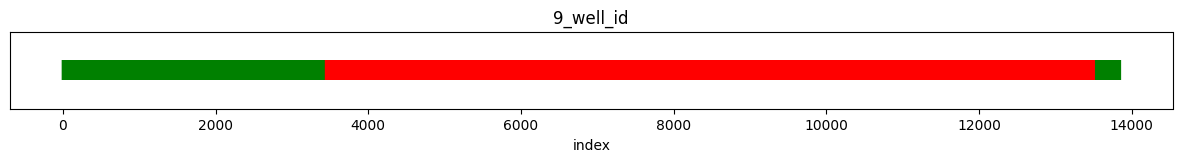

In [26]:

plt.figure(figsize=(15, 1))  # 设置图形大小，确保每个像素点都能清晰显示
# 根据预测结果设置每个像素点的颜色
colors = ['g' if i == 0 else 'r' for i in Y_test]

plt.scatter(range(len(Y_pred)), np.ones_like(Y_test), c=colors, marker='|', s=200)

plt.yticks([])  # 隐藏y轴刻度
plt.xlabel('index')
plt.title('9_well_id')

In [24]:
acc

0.2711644033516325

save_plt_line_successfully


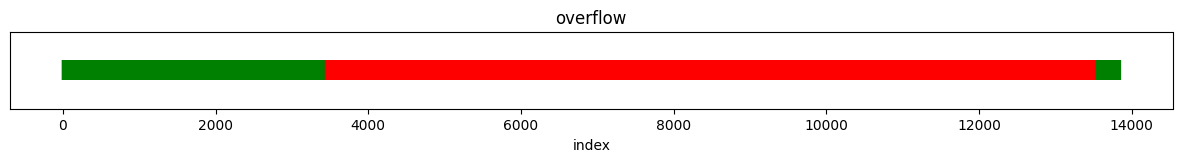

In [6]:
from Intelligent_well_control.src.models.utils.plt import PLT

tem = PLT(1)
tem.show2(Y_pred, Y_test, 'overflow', r'E:\项目\Intelligent_well_control\reports\images\\2023.11.17.png')

save_plt_line_successfully


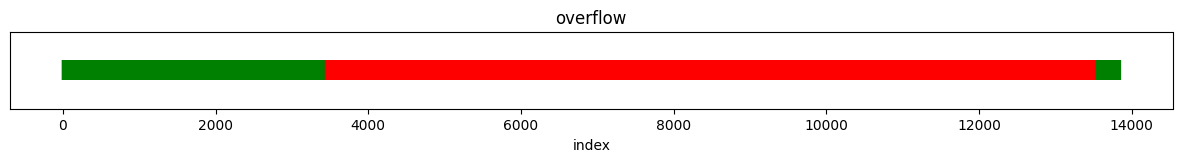

In [7]:
from Intelligent_well_control.src.models.utils.plt import PLT

tem = PLT(1)
tem.show2(Y_pred, Y_test, 'overflow', r'E:\项目\Intelligent_well_control\reports\images\\2023.11.17.png')

<Figure size 1000x1500 with 0 Axes>

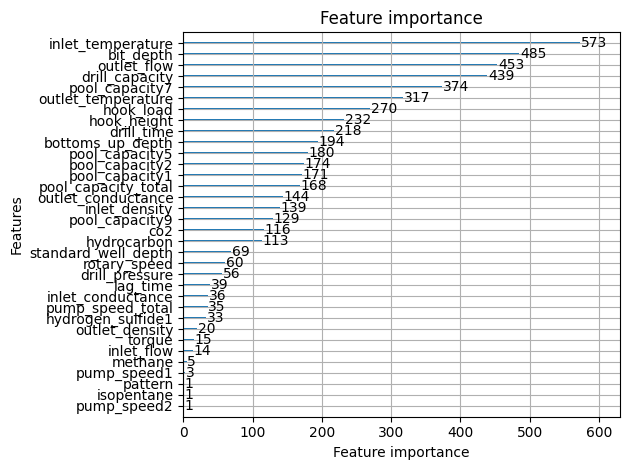

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
lgb.plot_importance(model1, max_num_features=100, importance_type='split')
plt.tight_layout()
plt.savefig(r'E:\项目\Intelligent_well_control\reports\images\\是否溢流_9区块前三口训练特征.png')

(13844, 373) (13844,)
1.0


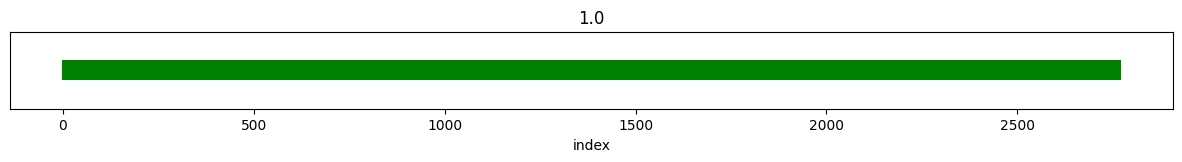

In [14]:
from sklearn.model_selection import train_test_split

X = data[data['well_id'].isin(test_well_ids)][feature_names]
y = data[data['well_id'].isin(test_well_ids)][labels]

print(X.shape, y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = lgb.LGBMClassifier(n_estimators=500)

model2.fit(X_train, Y_train)

Y_pred = model2.predict(X_test)

acc = accuracy_score(Y_pred, Y_test)

print(acc)

tem.show2(Y_test, Y_pred, acc)


<Figure size 1000x1500 with 0 Axes>

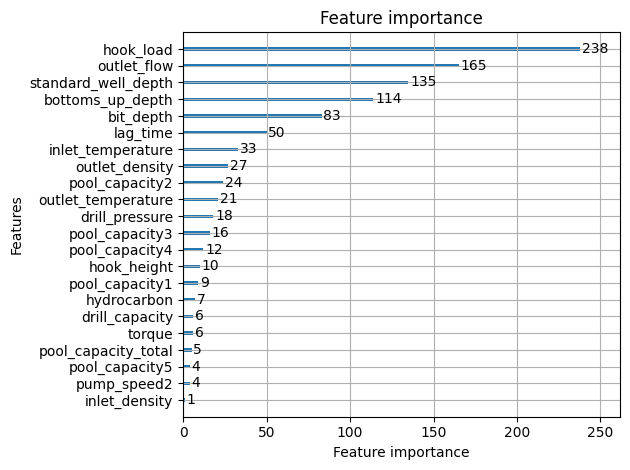

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
lgb.plot_importance(model2, max_num_features=100, importance_type='split')
plt.tight_layout()
plt.savefig(r'E:\项目\Intelligent_well_control\reports\images\\是否溢流_9区块111号单独训练特征.png')

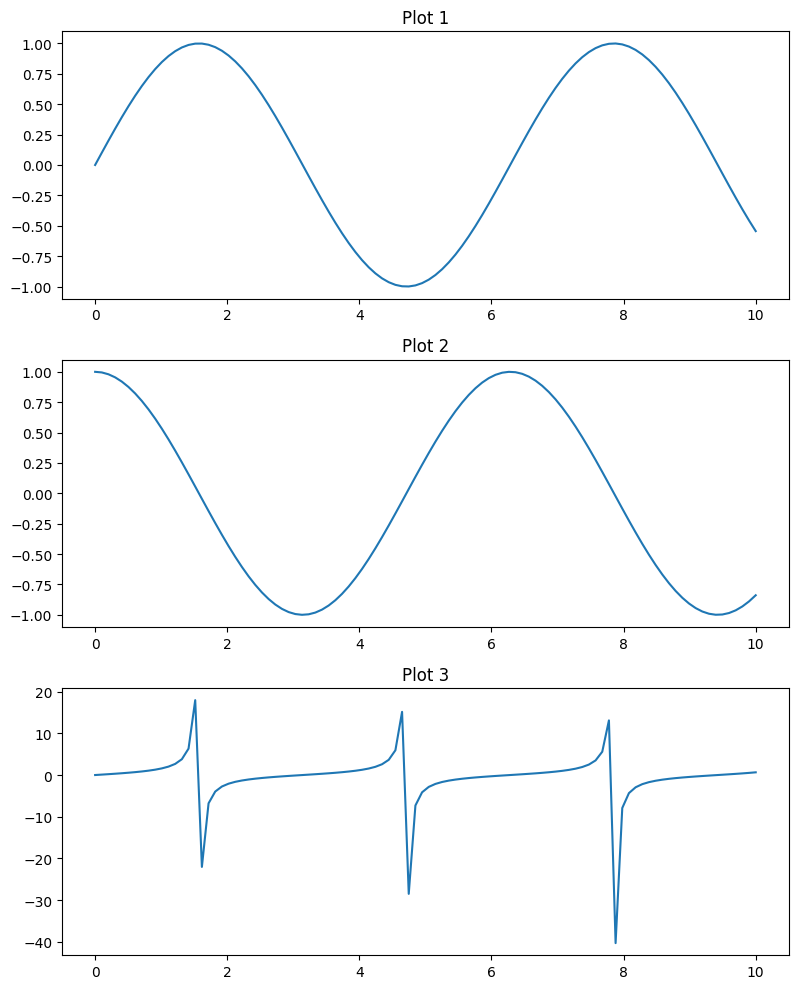

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 创建示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 创建 Figure 对象和子图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# 绘制第一个子图
axes[0].plot(x, y1)
axes[0].set_title('Plot 1')

# 绘制第二个子图
axes[1].plot(x, y2)
axes[1].set_title('Plot 2')

# 绘制第三个子图
axes[2].plot(x, y3)
axes[2].set_title('Plot 3')

# 调整布局
plt.tight_layout()

# 保存到同一个文件
plt.savefig('combined_plots.png')

# 显示图形（可选）
plt.show()
